# Exercise 05


In [84]:
using Plots
using Random
using DataStructures
using LsqFit
using LaTeXStrings

In [2]:
function generate_lattice(n::Integer, p::Real)
    lat = zeros(Int8, n+2, n+2)
    lat[2:end-1, 2:end-1] = Int8.(rand(n, n) .< p)
    return lat
end

function plot_lattice(lat::Matrix)
    m = maximum(lat) + 1
    colors = [:white, :green, :red, :blue, :orange, :black][1:m]
    heatmap(lat[2:end-1, 2:end-1], c = palette(colors), legend = :none)
    plot!(lims=(.5,size(lat)[1]-1.5))
    plot!(showaxis = false, ticks = false, aspect_ratio = :equal)
    #savefig("lattice")
end

plot_lattice (generic function with 1 method)

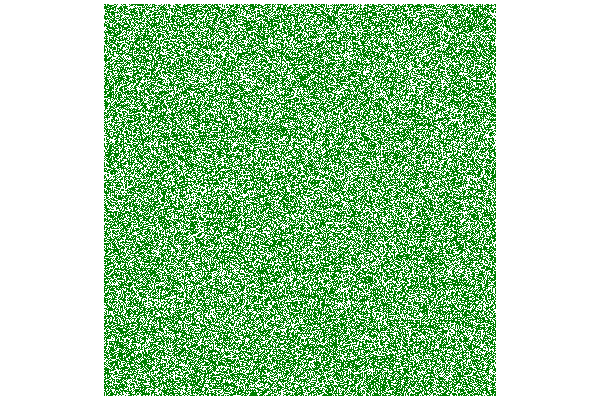

In [86]:
lat = generate_lattice(1000,0.592746)
plot_lattice(lat)

In [5]:
function create_cluster!(lat::Matrix)
    q = Queue{Tuple{Int64, Int64}}()
    #step 1: set the first row on fire and store all burning trees in a queue q
    np1 = size(lat)[1]-1  # n+1
    # Burn the first column (as julia is colum-major it is more efficient to iterate threw colums)
    it_percolates = false
    for i in 2:np1
        if lat[i,2] == 1
            lat[i,2] = 2
            enqueue!(q,(i,2))
            Nsteps = 0
            while(!isempty(q))
                Nsteps += 1

                qLen = length(q)
                for _ in 1:qLen
                    (i,j) = dequeue!(q)
                    if j == np1#this is the shortest path if we arrive at the right side
                        it_percolates = true
                    end
                    for (i2,j2) in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)]
                        if(lat[i2,j2]==1)
                            lat[i2,j2] = 2
                            enqueue!(q,(i2,j2))
                        end
                    end                            
                end        
            end
        end
        if it_percolates == true
            #markiere alle 1 zu 0
            lat[lat.==1] .= 0
            lat[lat.==2] .= 1
            return true
        else 
            #markiere alle 2 zu 0
            lat[lat.==2] .= 0
        end
    end
    

    
    
    return false
end

create_cluster! (generic function with 1 method)

true


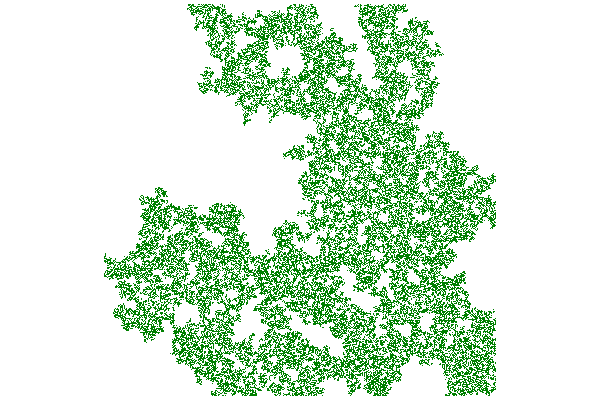

In [87]:
#Random.seed!(40)
#lat = generate_lattice(400,0.59274)
println(create_cluster!(lat))
plot_lattice(lat)

## Task 1: Box counting method

In [18]:
function count_boxes(ϵ::Integer,grid::Matrix)
    
    L::Integer = size(grid,1)-2
    if L%ϵ != 0
        return -1
    end
    N = 0
    step::Integer = L/ϵ
    
    for i in 1:ϵ
        for j in 1:ϵ
            a = (i-1)*step+2
            b = i*step+1
            c = (j-1)*step+2
            d = j*step+1
            if  sum(lat[a:b,c:d]) >= 1
                N+=1
            end
        end
    end
    
    return N
end

count_boxes (generic function with 1 method)

In [90]:
L = 1000
ra = Int.(round.(LinRange(1,L,L)))

E = []
N = []


for k in ra
    count = count_boxes(k,lat)
    if count != -1
        push!(N,count)
        push!(E,k)
    end
end


fractal dimension = 1.8442736360940386


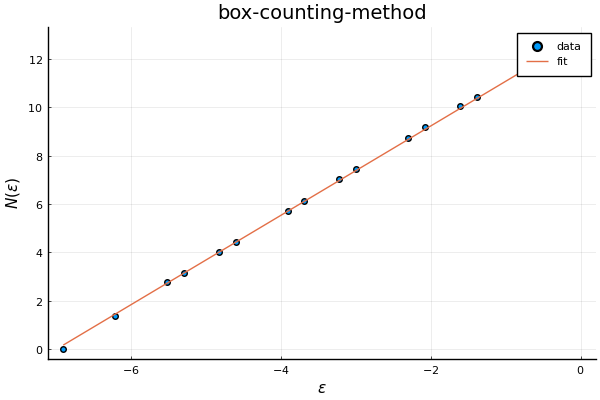

In [91]:
x = log.(1 ./reverse(E))
y = log.(N)

@. model(x,p) = p[1]*x+p[2]
p0 = [1.0,0.0]
fit = curve_fit(model, x, y, p0)

println("fractal dimension = $(coef(fit)[1])")

pyplot()
scatter(x,y, label = "data")
plot!(x, model(x,coef(fit)), label = "fit")
plot!(title = "box-counting-method", xlabel = L"$\epsilon$",ylabel= L"$N(\epsilon)$")




## Task 2: sand-box-method

In [92]:
println(91/48)

1.8958333333333333
